##### Imports

In [36]:
import numpy as np
import keras
from keras.utils import to_categorical
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D

#### Image visualization

In [37]:
def showImages(images, labels, offset=0):
    class_names = ['Spots', 'Eyespots']

    fig = plt.figure(figsize=(10, 10))
    for i in range(30):
        plt.subplot(6, 5, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i + offset])
        plt.xlabel(class_names[labels[i+offset]])

    fig.patch.set_facecolor('w')
    plt.show()

#### Loading data and preprocessing

Data X: 8273 images of shape: (2700,)
Training set: 6618 images of shape: (30, 30, 3)
Validation set: 1655 images of shape: (30, 30, 3)


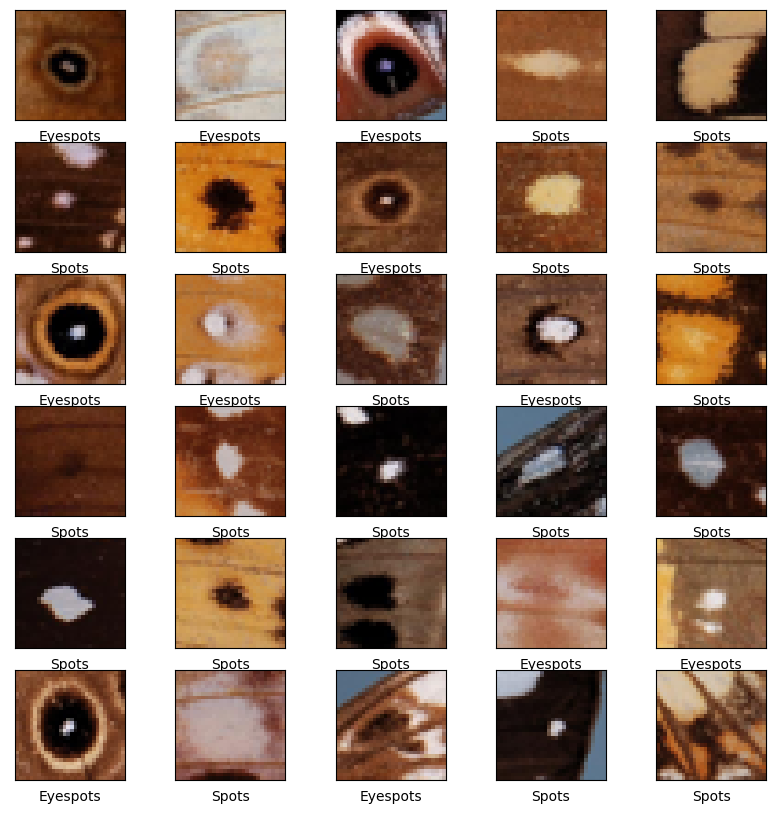

Spot label: [1. 0.]
Eyespot label: [0. 1.]


In [38]:
X_train = np.load('Xtrain_Classification1.npy')
y_train = np.load('ytrain_Classification1.npy')


print(f"Data X: {X_train.shape[0]} images of shape: {X_train.shape[1:]}")

# Split the data into training and test sets

x_train, x_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Reshaping to 30x30x3 for 30x30 RGB images

x_train = x_train.reshape(x_train.shape[0], 30, 30, 3)
x_validation = x_validation.reshape(x_validation.shape[0], 30, 30, 3)

print(f"Training set: {x_train.shape[0]} images of shape: {x_train.shape[1:]}")

print(f"Validation set: {x_validation.shape[0]} images of shape: {x_validation.shape[1:]}")

# Checking classifcation of images

showImages(x_train, y_train, 0)

# Normalizing the data
# Making sure that values are float

x_train = x_train.astype('float32')
x_validation = x_validation.astype('float32')

# Normalizing the RGB codes by dividing it to the max RGB value

x_train = x_train / 255
x_validation = x_validation / 255

# One-hot encoding

y_train = to_categorical(y_train)
y_validation = to_categorical(y_validation)

print(f"Spot label: {y_train[3]}") # Third image is a spot
print(f"Eyespot label: {y_train[0]}") # First image is an eyespot

# Image analysis

## CNN

In [39]:
batch_size = 128
epochs = 10
num_classes = 2
input_shape = (30, 30, 3)

### Model Construction

#### Convulutional and Pooling Layers

In [40]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#### Fully Connected Layers

In [45]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

#### Compile the Model

In [46]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

#### Train the Model

In [47]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_validation, y_validation))

Epoch 1/10
52/52 [==============================] - 7s 115ms/step - loss: 0.4053 - accuracy: 0.8395 - val_loss: 0.3732 - val_accuracy: 0.8314
Epoch 2/10
52/52 [==============================] - 6s 113ms/step - loss: 0.2860 - accuracy: 0.8832 - val_loss: 0.3501 - val_accuracy: 0.8411
Epoch 3/10
52/52 [==============================] - 6s 108ms/step - loss: 0.2680 - accuracy: 0.8918 - val_loss: 0.3417 - val_accuracy: 0.8417
Epoch 4/10
52/52 [==============================] - 6s 108ms/step - loss: 0.2511 - accuracy: 0.9007 - val_loss: 0.3814 - val_accuracy: 0.8375
Epoch 5/10
52/52 [==============================] - 5s 105ms/step - loss: 0.2282 - accuracy: 0.9112 - val_loss: 0.3552 - val_accuracy: 0.8580
Epoch 6/10
52/52 [==============================] - 6s 107ms/step - loss: 0.2089 - accuracy: 0.9205 - val_loss: 0.3806 - val_accuracy: 0.8399
Epoch 7/10
52/52 [==============================] - 6s 113ms/step - loss: 0.1943 - accuracy: 0.9243 - val_loss: 0.3798 - val_accuracy: 0.8502
Epoch 

## Visualize the Results

Validation loss: 0.3470001220703125, Validation accuracy: 0.835045337677002


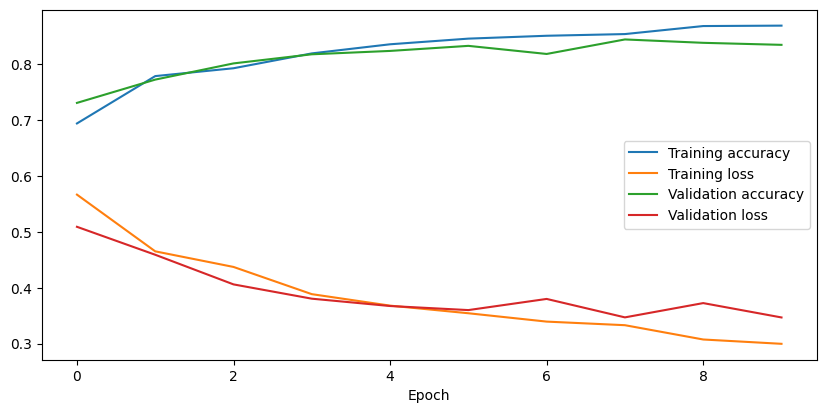

In [44]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.legend(loc='best')

validation_loss, validation_accuracy = model.evaluate(x_validation, y_validation, verbose=0)

print(f"Validation loss: {validation_loss}, Validation accuracy: {validation_accuracy}")

## Evaluate the Model

In [ ]:
score = model.evaluate(x_validation, y_validation, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

52/52 [==============================] - 1s 7ms/step


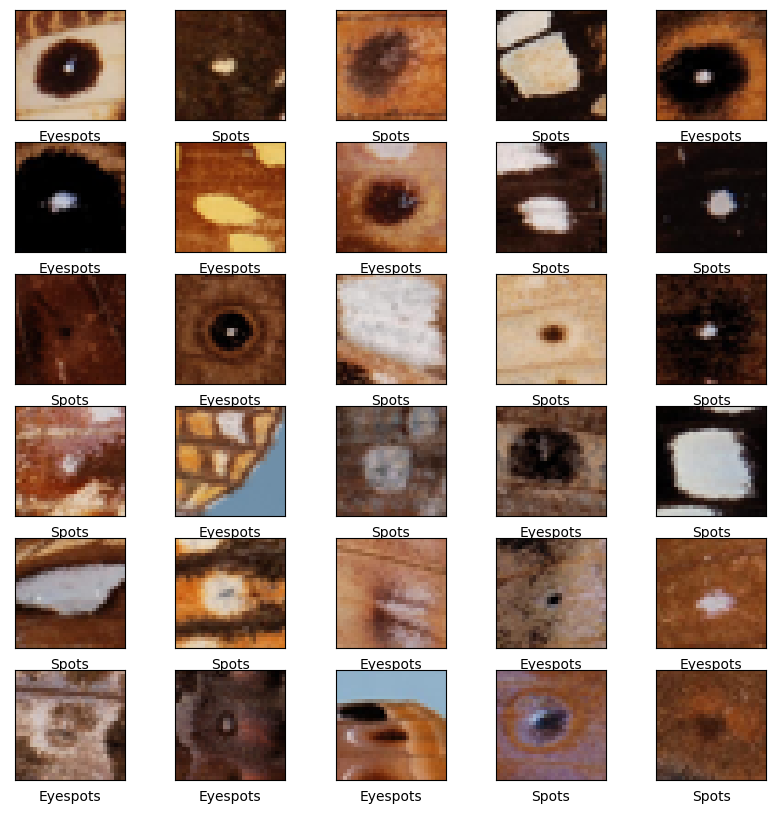

In [48]:
predictions = model.predict(x_validation)

showImages(x_validation, predictions.argmax(axis=1), 0)